In [1]:
import sys
sys.path.append("../../../")

import pandas as pd
from preprocessing import preprocessing_text_with_lemma
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
fix_file = "../../../dataset/fix_data.csv"
fix_df = pd.read_csv(fix_file)

In [3]:
fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text_with_lemma)

In [4]:
X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

In [5]:
import sys
sys.path.append("..")

from KFold import KF

kf = KF(X, y, 0.3)
kf.split()

{0: 0.044, 1: 0.956}
{0: 0.984, 1: 0.016}
{0: 0.992, 1: 0.008}
{0: 0.841, 1: 0.159}
{0: 0.0, 1: 1.0}
{0: 0.836, 1: 0.164}
{0: 0.499, 1: 0.501}
{0: 0.327, 1: 0.673}
{0: 0.576, 1: 0.424}
{0: 0.257, 1: 0.743}
{0: 0.113, 1: 0.887}
{0: 0.152, 1: 0.848}
{0: 0.186, 1: 0.814}
{0: 0.893, 1: 0.107}
{0: 0.958, 1: 0.042}
{0: 0.012, 1: 0.988}
{0: 0.982, 1: 0.018}
{0: 0.972, 1: 0.028}
{0: 0.082, 1: 0.918}
{0: 0.007, 1: 0.993}
{0: 0.695, 1: 0.305}
{0: 0.001, 1: 0.999}
{0: 0.013, 1: 0.987}
{0: 0.006, 1: 0.994}
{0: 0.081, 1: 0.919}
{0: 0.002, 1: 0.998}
{0: 0.014, 1: 0.986}
{0: 0.291, 1: 0.709}
{0: 0.021, 1: 0.979}
{0: 0.001, 1: 0.999}
{0: 0.026, 1: 0.974}
{0: 0.002, 1: 0.998}
{0: 0.979, 1: 0.021}
{0: 0.699, 1: 0.301}
{0: 0.316, 1: 0.684}
{0: 0.185, 1: 0.815}
{0: 0.078, 1: 0.922}
{0: 0.108, 1: 0.892}
{0: 0.521, 1: 0.479}
{0: 0.494, 1: 0.506}
{0: 0.063, 1: 0.937}
{0: 0.027, 1: 0.973}
{0: 0.12, 1: 0.88}
{0: 0.246, 1: 0.754}
{0: 0.34, 1: 0.66}
{0: 0.003, 1: 0.997}
{0: 0.011, 1: 0.989}
{0: 0.012, 1: 0.988}


In [6]:
print("Cross-validation scores:", kf.scores)
print("Mean cross-validation score:", round(np.mean(kf.scores), 3))

Cross-validation scores: [0.818, 0.785, 0.818, 0.792, 0.788, 0.802, 0.794, 0.786, 0.806, 0.779]
Mean cross-validation score: 0.797


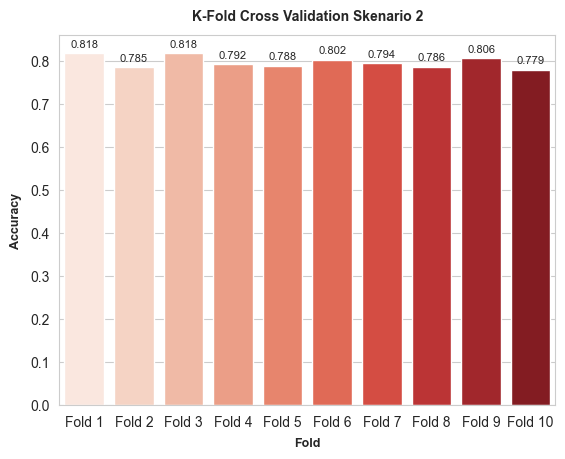

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

scenarios = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
accuracy_values = kf.scores

# Define custom color palette with shades of red and reverse it
custom_palette = sns.color_palette("Reds_r", len(scenarios))[::-1]

sns.set_style('whitegrid')
ax = sns.barplot(x=scenarios, y=accuracy_values, palette=custom_palette)
plt.title('K-Fold Cross Validation Skenario 2', fontsize=10, fontweight='bold', pad=11)
plt.xlabel('Fold', fontsize=9, fontweight='semibold', labelpad=6)  # Add x-axis title
plt.ylabel('Accuracy', fontsize=9, fontweight='semibold', labelpad=6)   # Add y-axis title

# Add numeric values above the bars
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

plt.show()